In [ ]:
#!pip install git+https://github.com/CatalinVoss/GuidedLDA

  Cloning https://github.com/CatalinVoss/GuidedLDA to /tmp/pip-req-build-m4vbkjlj
  Running command git clone -q https://github.com/CatalinVoss/GuidedLDA /tmp/pip-req-build-m4vbkjlj
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev27-cp37-cp37m-linux_x86_64.whl size=2492652 sha256=5abe97da30f3e2d0f59eba96fb4b3adac93767e55c3ae2017483a36f75485259
  Stored in directory: /tmp/pip-ephem-wheel-cache-yh81cf9i/wheels/89/36/af/b17db85e4052d64669165324a073f4eb9446342cb1de9767c4
Successfully built guidedlda


In [1]:
import pandas as pd
import multiprocessing
import numpy as np
import os
import random
from numpy import array
from numpy import mean 
#import guidedlda

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pip install emoji

     |████████████████████████████████| 170 kB 9.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=2409eb27dcfbfb1dad4f4b63cb7e66fd3efd2de4f0872098d4b033ae48457879
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
# pip install spacy_langdetect

In [ ]:
# from spacy_langdetect import LanguageDetector
# import spacy
# nlp = spacy.load('en')  # 1
# nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) #2


In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import wordnet
import numpy as np
np.random.seed(42)

In [4]:
dataset = pd.read_excel('/content/drive/MyDrive/IHSIP/cleaned_22676_Aug_5.xlsx', index_col= 0)
dataset

,postid,username,comment,dataset
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1
2,B7--VEMJWfD,fandee_g,👍👍👍,1
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1
...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2
22672,CEZZyqshFLq,sachuhan,Nice smile,2
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2


In [5]:
import pandas as pd
import numpy as np


#from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stopwords_list = stopwords.words('english')
punctuations = list(set(string.punctuation))

unwanted_list=punctuations+stopwords_list

Emoji translation

In [8]:
emoji_trans = pd.read_excel('/content/drive/MyDrive/IHSIP/Emoji Translation Draft 3 (1).xlsx', index_col=0)
emoji_trans['combine'] = len(emoji_trans)*['']
emoji_trans = emoji_trans.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9',	'Unnamed: 10', 'Commonly repeated words'])
emoji_trans

,emoji,translation,Translation,Anger Fear Other,combine
0,♂,male sign,Men masculinity,Other,
1,🌄,sunrise over mountains,New beginnings,Other,
2,😣,persevering face,Struggling anguish,Anger,
3,😈,smiling face with horns,Mischievous devious,Other,
4,⛔,no entry,Stop,Other,
...,...,...,...,...,...
528,🙌,raising hands,Praising agreeable,Other,
529,💟,heart decoration,Love,Other,
530,🧢,billed cap,Lying,Other,
531,💐,bouquet,Affection,Other,


Combine the emoji package translation with customize translation

In [9]:
for i in range(len(emoji_trans)):
  n = emoji_trans['Translation'][8] 
  if isinstance(emoji_trans['Translation'][i], str):
  # if emoji_trans['Translation'][i] != n:
    #print(emoji_trans['translation'][i], emoji_trans['Translation'][i])
    emoji_trans['combine'][i] = emoji_trans['translation'][i] + ' ' + emoji_trans['Translation'][i]
  else:
    emoji_trans['combine'][i] = emoji_trans['translation'][i]

emoji_trans

,emoji,translation,Translation,Anger Fear Other,combine
0,♂,male sign,Men masculinity,Other,male sign Men masculinity
1,🌄,sunrise over mountains,New beginnings,Other,sunrise over mountains New beginnings
2,😣,persevering face,Struggling anguish,Anger,persevering face Struggling anguish
3,😈,smiling face with horns,Mischievous devious,Other,smiling face with horns Mischievous devious
4,⛔,no entry,Stop,Other,no entry Stop
...,...,...,...,...,...
528,🙌,raising hands,Praising agreeable,Other,raising hands Praising agreeable
529,💟,heart decoration,Love,Other,heart decoration Love
530,🧢,billed cap,Lying,Other,billed cap Lying
531,💐,bouquet,Affection,Other,bouquet Affection


In [10]:
emoji_text_dict = {emoji_trans['emoji'][i]: emoji_trans['combine'][i] for i in range(len(emoji_trans))}

In [11]:
dataset['original_comment'] = dataset['comment']
for i in range(22676):
  for j in dataset['comment'][i]:
    if j in emoji_text_dict.keys():
      text = emoji_text_dict[j]+ ' '
      dataset['comment'][i] = dataset['comment'][i].replace(j, text)

dataset
# import emoji
# # Demojize all comments
# demojize_comment = []
# for c in dataset['comment']:
#   demojize_comment.append(emoji.demojize(c))
# dataset['noemo_comment']=demojize_comment
# dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,postid,username,comment,dataset,original_comment
0,B7--VEMJWfD,fallschrimjager_,clapping hands Applauding approval clapping h...,1,👏👏👏😍😍😍
1,B7--VEMJWfD,djmackjp,Thank you! folded hands Praying support hope,1,Thank you! 🙏
2,B7--VEMJWfD,fandee_g,thumbs up Approval thumbs up Approval thumbs ...,1,👍👍👍
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,#fx_hdr #igworldclub_edits #total_editpics #ph...
4,B7--VEMJWfD,iam_y0y0,fire Hot Lust fire Hot Lust fire Hot Lust,1,🔥🔥🔥
...,...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile smiling face with heart eyes Love ...,2,Nice smile 😍😍
22672,CEZZyqshFLq,sachuhan,Nice smile,2,Nice smile
22673,CEZZyqshFLq,sadiqulamine,smiling face with heart eyes Love adoration r...,2,😍❤🌺🌸🌺🌸
22674,CEZZyqshFLq,qasimchohanqasimchohan,bouquet Affection bouquet Affection bouquet Af...,2,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile


Remove emoji

In [ ]:
# import re

# text = u'This is a smiley face \U0001f602'
# print(text) # with emoji

# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

# print(deEmojify(text))

This is a smiley face 😂
This is a smiley face 


In [ ]:
# for i in range(22676):
#   dataset['comment'][i] = deEmojify(dataset['comment'][i])
# dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,postid,username,comment,dataset
0,B7--VEMJWfD,fallschrimjager_,,1
1,B7--VEMJWfD,djmackjp,Thank you!,1
2,B7--VEMJWfD,fandee_g,,1
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1
4,B7--VEMJWfD,iam_y0y0,,1
...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile,2
22672,CEZZyqshFLq,sachuhan,Nice smile,2
22673,CEZZyqshFLq,sadiqulamine,❤,2
22674,CEZZyqshFLq,qasimchohanqasimchohan,cool smile,2


In [ ]:
# dataset['comment'].replace('', np.nan, inplace=True)
# dataset['comment'].replace(' ', np.nan, inplace=True)
# dataset = dataset.dropna(subset = ['comment'])
# dataset

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,postid,username,comment,dataset
1,B7--VEMJWfD,djmackjp,Thank you!,1
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1
6,B7--VEMJWfD,photo_creation_silver,super,1
8,B7-15BuDTF4,gingerfoxfitt,#wuhan,1
9,B7-15BuDTF4,aggielang,Totally agree with you,1
...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile,2
22672,CEZZyqshFLq,sachuhan,Nice smile,2
22673,CEZZyqshFLq,sadiqulamine,❤,2
22674,CEZZyqshFLq,qasimchohanqasimchohan,cool smile,2


In [15]:
def clean_text_initial(text):
    text = ' '.join([x.lower() for x in word_tokenize(text) if x.lower() not in unwanted_list and len(x)>1])
    text = ' '.join([x.lower() for x in word_tokenize(text) if nltk.pos_tag([x])[0][1].startswith("NN") or nltk.pos_tag([x])[0][1].startswith("JJ")])
    return text.strip()

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
def clean_text (tweet):
  # remove links 
  # temp_text = []
  # for x in text_ls:
  #     #x = re.sub("#[A-Za-z0-9_]+","", x)
  #     #x = re.sub("@[A-Za-z0-9_]+","", x)
  #     x = re.sub("\n+", " ", x)
  #     x = re.sub("\r+", " ", x)
  #     x = re.sub(r"http\S+", "", x)
  #     temp_text.append(x)
  # return pd.Series(temp_text)
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', str(tweet))
  # remove old style retweet text "RT"
  #tweet = re.sub(r'^RT[\s]+', '', str(tweet))
  # remove hyperlinks
  pattern = r'(http://[^"\s]+)|(@\w+)'
  tweet = tweet.replace(pattern, "")
  # tokenize tweets
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
      stem_word = stemmer.stem(word)  # stemming word
      tweets_clean.append(stem_word)

  return " ".join(tweets_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
dataset["cleaned_comment"]=dataset.comment.apply(lambda text:clean_text(str(text)))
dataset.head()

,postid,username,comment,dataset,original_comment,cleaned_comment
0,B7--VEMJWfD,fallschrimjager_,clapping hands Applauding approval clapping h...,1,👏👏👏😍😍😍,clap hand applaud approv clap hand applaud app...
1,B7--VEMJWfD,djmackjp,Thank you! folded hands Praying support hope,1,Thank you! 🙏,thank fold hand pray support hope
2,B7--VEMJWfD,fandee_g,thumbs up Approval thumbs up Approval thumbs ...,1,👍👍👍,thumb approv thumb approv thumb approv
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,#fx_hdr #igworldclub_edits #total_editpics #ph...,#fx_hdr #igworldclub_edit #total_editp #photo_...
4,B7--VEMJWfD,iam_y0y0,fire Hot Lust fire Hot Lust fire Hot Lust,1,🔥🔥🔥,fire hot lust fire hot lust fire hot lust


Supervised learning

Train data combination

In [25]:
train_angerdata = pd.read_csv('/content/drive/MyDrive/IHSIP/train_data/anger-ratings-0to1.train.txt', delimiter = "\t", header=None)
train_angerdata.columns = ["id", "Comments", "Topic_anger", "intensity"]
train_angerdata = train_angerdata[train_angerdata.intensity >= 0.5]
train_angerdata = train_angerdata.drop(columns='intensity')
train_angerdata

,id,Comments,Topic_anger
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger
1,10001,So my Indian Uber driver just called someone t...,anger
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger
3,10003,so ef whichever butt wipe pulled the fire alar...,anger
4,10004,Don't join @BTCare they put the phone down on ...,anger
...,...,...,...
417,10417,I am using twitter as a coping mechanism for r...,anger
418,10418,@AgentTinsley I believe that's what you call t...,anger
420,10420,#india will take #revenge by making 3 new mov...,anger
422,10422,Drop Snapchat names #bored #snap #swap #pics,anger


In [26]:
train_feardata = pd.read_csv('/content/drive/MyDrive/IHSIP/train_data/fear-ratings-0to1.train.txt', delimiter = "\t", header=None)
train_feardata.columns = ["id", "Comments", "Topic_fear", "intensity"]
train_feardata = train_feardata[train_feardata.intensity >= 0.5]
train_feardata = train_feardata.drop(columns='intensity')
train_feardata

,id,Comments,Topic_fear
0,20000,I feel like I am drowning. #depression #anxiet...,fear
1,20001,I get so nervous even thinking about talking t...,fear
2,20002,I lost my blinders .... #panic,fear
3,20003,I feel like I am drowning. #depression #falur...,fear
4,20004,This is the scariest American Horror Story out...,fear
...,...,...,...
560,20560,"3 #tmobile #stores, #original #note7 #customer...",fear
561,20561,Going to get myself a copy of @StephenKing's C...,fear
562,20562,@GSchwartz_ it wasn't a joke . #bully,fear
563,20563,If you get called #shy this means you are #con...,fear


In [27]:
train_joydata = pd.read_csv('/content/drive/MyDrive/IHSIP/train_data/joy-ratings-0to1.train.txt', delimiter = "\t", header=None)
train_joydata.columns = ["id", "Comments", "Topic_joy", "intensity"]
train_joydata = train_joydata[train_joydata.intensity >= 0.5]
train_joydata = train_joydata.drop(columns='intensity')
train_joydata

,id,Comments,Topic_joy
0,30000,Just got back from seeing @GaryDelaney in Burs...,joy
1,30001,Oh dear an evening of absolute hilarity I don'...,joy
2,30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,30004,I feel so blessed to work with the family that...,joy
...,...,...,...
400,30400,@DailyMailCeleb @KTHopkins Katie I love how yo...,joy
401,30401,Watch this amazing live.ly broadcast by @kana_...,joy
402,30402,@TiburonChamber plus a hearty pour of #yachtro...,joy
403,30403,@u4uzoma Boss I see you as someone that is jov...,joy


In [28]:
train_sadnessdata = pd.read_csv('/content/drive/MyDrive/IHSIP/train_data/sadness-ratings-0to1.train.txt', delimiter = "\t", header=None)
train_sadnessdata.columns = ["id", "Comments", "Topic_sadness", "intensity"]
train_sadnessdata = train_sadnessdata[train_sadnessdata.intensity >= 0.5]
train_sadnessdata = train_sadnessdata.drop(columns='intensity')
train_sadnessdata

,id,Comments,Topic_sadness
0,40000,Depression sucks! #depression,sadness
1,40001,Feeling worthless as always #depression,sadness
2,40002,Feeling worthless as always,sadness
3,40003,My #Fibromyalgia has been really bad lately wh...,sadness
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness
...,...,...,...
379,40379,What day is it #lost,sadness
380,40380,Has anyone noticed that @npr stories in recent...,sadness
381,40381,@ChibiReviews Post series depression can be qu...,sadness
382,40382,@iTriborg — make him feel vigorous. 'Fine. You...,sadness


In [29]:
train_data = train_angerdata.append([train_feardata, train_joydata, train_sadnessdata], sort=False)
#train_data = train_angerdata.merge(train_feardata, how='left', on='Comments')
train_data

,id,Comments,Topic_anger,Topic_fear,Topic_joy,Topic_sadness
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,NaN,NaN,NaN
1,10001,So my Indian Uber driver just called someone t...,anger,NaN,NaN,NaN
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,NaN,NaN,NaN
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,NaN,NaN,NaN
4,10004,Don't join @BTCare they put the phone down on ...,anger,NaN,NaN,NaN
...,...,...,...,...,...,...
379,40379,What day is it #lost,NaN,NaN,NaN,sadness
380,40380,Has anyone noticed that @npr stories in recent...,NaN,NaN,NaN,sadness
381,40381,@ChibiReviews Post series depression can be qu...,NaN,NaN,NaN,sadness
382,40382,@iTriborg — make him feel vigorous. 'Fine. You...,NaN,NaN,NaN,sadness


In [30]:
train_data["Topic_anger"].replace({"anger": "1", np.nan: "0"}, inplace=True)
train_data["Topic_fear"].replace({"fear": "1", np.nan: "0"}, inplace=True)
train_data["Topic_joy"].replace({"joy": "1", np.nan: "0"}, inplace=True)
train_data["Topic_sadness"].replace({"sadness": "1", np.nan: "0"}, inplace=True)

In [31]:
train_data.to_csv('/content/drive/MyDrive/IHSIP/train_data/traindata_1765.csv')

In [15]:
train_data = pd.read_csv('/content/drive/MyDrive/IHSIP/train_data/traindata_1765.csv', index_col=0)

Text data combination

In [ ]:
test_angerdata = pd.read_csv('/content/drive/MyDrive/IHSIP/test_data/anger-ratings-0to1.test.target.txt', delimiter = "\t", header=None)
test_angerdata.columns = ["id", "Comments", "Topic_anger", "intensity"]
test_angerdata = test_angerdata.drop(columns='intensity')
test_angerdata

,id,Comments,Topic_anger
0,10941,At the point today where if someone says somet...,anger
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger
2,10943,This game has pissed me off more than any othe...,anger
3,10944,@spamvicious I've just found out it's Candice ...,anger
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
...,...,...,...
755,11696,@ggreenwald What if the supposed animosity is ...,anger
756,11697,Will BYU's offense score 24+ vs WVU?,anger
757,11698,Id love 2 c Gyimah in action but his coach is ...,anger
758,11699,Forgiving means operating with God's spirit &a...,anger


In [ ]:
test_feardata = pd.read_csv('/content/drive/MyDrive/IHSIP/test_data/fear-ratings-0to1.test.target.txt', delimiter = "\t", header=None)
test_feardata.columns = ["id", "Comments", "Topic_fear", "intensity"]
test_feardata = test_feardata.drop(columns='intensity')
test_feardata

,id,Comments,Topic_fear
0,21257,#Matthew 25; 1-13\nCould somebody shoot a #vid...,fear
1,21258,@bkero @whispersystems Which really sucks beca...,fear
2,21259,Be #afraid of the #quiet ones they are the one...,fear
3,21260,@riinkanei he's a horrible person and now i ga...,fear
4,21261,What we fear doing most is usually what we mos...,fear
...,...,...,...
990,22247,"@01Starblazer 9 -9 vs Atlanta this yr, 2 - 11 ...",fear
991,22248,I'm shaking now.,fear
992,22249,me: are you guys dating yet #trans #nervous #b...,fear
993,22250,She: Why are you listening to The Eurythmics?\...,fear


In [ ]:
test_joydata = pd.read_csv('/content/drive/MyDrive/IHSIP/test_data/joy-ratings-0to1.test.target.txt', delimiter = "\t", header=None)
test_joydata.columns = ["id", "Comments", "Topic_joy", "intensity"]
test_joydata = test_joydata.drop(columns='intensity')
test_joydata

,id,Comments,Topic_joy
0,30902,You must be knowing #blithe means (adj.) Happ...,joy
1,30903,Old saying 'A #smile shared is one gained for ...,joy
2,30904,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,30905,@Elaminova sparkling water makes your life spa...,joy
4,30906,I'm tired of everybody telling me to chill out...,joy
...,...,...,...
709,31611,With a very tired body and mind and sparkling ...,joy
710,31612,I refuse to be a chirp chirp girl,joy
711,31613,It was very hard to stifle my laughter after I...,joy
712,31614,"While I was walking, a little boy in a red shi...",joy


In [ ]:
test_sadnessdata = pd.read_csv('/content/drive/MyDrive/IHSIP/test_data/sadness-ratings-0to1.test.target.txt', delimiter = "\t", header=None)
test_sadnessdata.columns = ["id", "Comments", "Topic_sadness", "intensity"]
test_sadnessdata = test_sadnessdata.drop(columns='intensity')
test_sadnessdata

,id,Comments,Topic_sadness
0,40860,My 2 teens sons just left in the car to get ha...,sadness
1,40861,My 2 teens sons just left in the car to get ha...,sadness
2,40862,HartRamsey'sUPLIFT If you're still discouraged...,sadness
3,40863,@AmontanaW I nearly dropped my phone into the ...,sadness
4,40864,Whenever I'm feeling sad I will listen to mons...,sadness
...,...,...,...
668,41528,Why does Candice constantly pout #GBBO 💄😒,sadness
669,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness
670,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness
671,41531,I'm buying art supplies and I'm debating how s...,sadness


In [ ]:
test_data = test_angerdata.append([test_feardata, test_joydata, test_sadnessdata], sort=False)
#train_data = train_angerdata.merge(train_feardata, how='left', on='Comments')
test_data

,id,Comments,Topic_anger,Topic_fear,Topic_joy,Topic_sadness
0,10941,At the point today where if someone says somet...,anger,NaN,NaN,NaN
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,NaN,NaN,NaN
2,10943,This game has pissed me off more than any othe...,anger,NaN,NaN,NaN
3,10944,@spamvicious I've just found out it's Candice ...,anger,NaN,NaN,NaN
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,NaN,NaN,NaN
...,...,...,...,...,...,...
668,41528,Why does Candice constantly pout #GBBO 💄😒,NaN,NaN,NaN,sadness
669,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",NaN,NaN,NaN,sadness
670,41530,"@AceOperative789 no pull him afew weeks ago, s...",NaN,NaN,NaN,sadness
671,41531,I'm buying art supplies and I'm debating how s...,NaN,NaN,NaN,sadness


In [ ]:
test_data["Topic_anger"].replace({"anger": "1", np.nan: "0"}, inplace=True)
test_data["Topic_fear"].replace({"fear": "1", np.nan: "0"}, inplace=True)
test_data["Topic_joy"].replace({"joy": "1", np.nan: "0"}, inplace=True)
test_data["Topic_sadness"].replace({"sadness": "1", np.nan: "0"}, inplace=True)
test_data

,id,Comments,Topic_anger,Topic_fear,Topic_joy,Topic_sadness
0,10941,At the point today where if someone says somet...,1,0,0,0
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,1,0,0,0
2,10943,This game has pissed me off more than any othe...,1,0,0,0
3,10944,@spamvicious I've just found out it's Candice ...,1,0,0,0
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,1,0,0,0
...,...,...,...,...,...,...
668,41528,Why does Candice constantly pout #GBBO 💄😒,0,0,0,1
669,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",0,0,0,1
670,41530,"@AceOperative789 no pull him afew weeks ago, s...",0,0,0,1
671,41531,I'm buying art supplies and I'm debating how s...,0,0,0,1


In [ ]:
test_data.to_csv('/content/drive/MyDrive/IHSIP/test_data/testdata_3142.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/IHSIP/test_data/testdata_3142.csv', index_col=0)

Supervised learning Training

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/IHSIP/train_data/traindata_3613.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/IHSIP/test_data/testdata_3142.csv', index_col=0)

In [ ]:
traindataset = train_data.append(test_data, sort=False)
traindataset

,id,Comments,Topic_anger,Topic_fear,Topic_joy,Topic_sadness
0,10000,How the fu*k! Who the heck! moved my fridge!.....,1,0,0,0
1,10001,So my Indian Uber driver just called someone t...,1,0,0,0
2,10002,@DPD_UK I asked for my parcel to be delivered ...,1,0,0,0
3,10003,so ef whichever butt wipe pulled the fire alar...,1,0,0,0
4,10004,Don't join @BTCare they put the phone down on ...,1,0,0,0
...,...,...,...,...,...,...
668,41528,Why does Candice constantly pout #GBBO 💄😒,0,0,0,1
669,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",0,0,0,1
670,41530,"@AceOperative789 no pull him afew weeks ago, s...",0,0,0,1
671,41531,I'm buying art supplies and I'm debating how s...,0,0,0,1


In [22]:
!pip install allennlp==0.9.0.
!pip install flair==0.8

     |████████████████████████████████| 7.6 MB 5.8 MB/s 
     |████████████████████████████████| 123 kB 67.9 MB/s 
     |████████████████████████████████| 235 kB 74.1 MB/s 
     |████████████████████████████████| 64 kB 3.7 MB/s 
     |████████████████████████████████| 47 kB 5.6 MB/s 
     |████████████████████████████████| 124 kB 65.5 MB/s 
     |████████████████████████████████| 30.8 MB 1.5 MB/s 
     |████████████████████████████████| 5.8 MB 72.3 MB/s 
     |████████████████████████████████| 131 kB 77.0 MB/s 
     |████████████████████████████████| 158 kB 79.0 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 259 kB 82.5 MB/s 
     |████████████████████████████████| 1.2 MB 77.1 MB/s 
     |████████████████████████████████| 251 kB 71.6 MB/s 
     |████████████████████████████████| 127 kB 86.2 MB/s 
     |████████████████████████████████| 2.1 MB 85.5 MB/s 
     |████████████████████████████████| 82 kB 498 kB/s 
     |█████████████████

     |████████████████████████████████| 277 kB 6.9 MB/s 
     |████████████████████████████████| 19.7 MB 91 kB/s 
     |████████████████████████████████| 3.1 MB 52.5 MB/s 
     |████████████████████████████████| 1.2 MB 51.8 MB/s 
     |████████████████████████████████| 788 kB 64.9 MB/s 
     |████████████████████████████████| 59 kB 8.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 981 kB 61.5 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 895 kB 50.6 MB/s 
     |████████████████████████████████| 3.3 MB 72.5 MB/s 
     |████████████████████████████████| 596 kB 77.6 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=03e53033289989e253bc3b8768e27e338eedc6b8dfd78519a18e6a7b7318d8e6
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005

In [16]:
from torch.optim.adam import Adam
from flair.data import Corpus
from flair.datasets import ClassificationCorpus
from pathlib import Path
from flair.data import Sentence
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.embeddings import TransformerDocumentEmbeddings
from flair.embeddings import FlairEmbeddings, BertEmbeddings, WordEmbeddings, DocumentRNNEmbeddings, ELMoEmbeddings

In [17]:
df_anger = train_data.drop(columns=['Topic_fear', 'Topic_joy', 'Topic_sadness', 'id'])
df_anger['Topic_anger'] = '__label__' + df_anger['Topic_anger'].astype(str)
df_anger = df_anger.rename(columns={"Comments":"text", 
                "Topic_anger":"label"})
random = df_anger.sample(frac=1)
random

,text,label
178,@WestHamUtd poor service tonight to find seaso...,__label__0
213,@Casper10666 I assure you there is no laughter...,__label__1
301,I mourn the creativity lost.,__label__0
425,can't believe Mint fest is two days away and i...,__label__0
269,It's meant to be!!,__label__0
...,...,...
154,@Olajide_Shutti lmaoo. It will be a joyful day.,__label__0
318,I found #marmite in Australia. `:),__label__0
449,Approaching #terrorism from an anti-racism POV...,__label__0
78,If anybody needs me I'll be drowning my blues ...,__label__0


In [18]:
random.iloc[0:int(len(random)*0.8)].to_csv('/content/drive/MyDrive/IHSIP/train_data/anger_train.csv', sep='\t', index = False, header = False, columns=['label', 'text'])
random.iloc[int(len(random)*0.8):int(len(random)*0.9)].to_csv('/content/drive/MyDrive/IHSIP/train_data/anger_test.csv', sep='\t', index = False, header = False, columns=['label', 'text'])
random.iloc[int(len(random)*0.9):].to_csv('/content/drive/MyDrive/IHSIP/train_data/anger_dev.csv', sep='\t', index = False, header = False, columns=['label', 'text']);

In [19]:
# init Flair embeddings
flair_forward_embedding = FlairEmbeddings('multi-forward')
flair_backward_embedding = FlairEmbeddings('multi-backward')

corpus: Corpus = ClassificationCorpus(Path('/content/drive/MyDrive/IHSIP/train_data'), 
                            test_file='anger_test.csv', 
                            dev_file='anger_dev.csv', 
                            train_file='anger_train.csv')
label_dict = corpus.make_label_dictionary()

# init BERT base (cases)
#optional_embedding = BertEmbeddings('bert-base-cased')
# OR init ELMo (original)
optional_embedding = ELMoEmbeddings('original')
# 3. make a list of word embeddings
#word_embeddings = [WordEmbeddings('glove')]
word_embeddings = list(filter(None, [
    optional_embedding,
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]))

# 3. initialize transformer document embeddings (many models are available)
#document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)
document_embeddings = DocumentRNNEmbeddings(
    word_embeddings,
    hidden_size=512,
    reproject_words=True,
    reproject_words_dimension=256,
)

# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus, optimizer=Adam)

# 6. start the training
trainer.train('/content/drive/MyDrive/IHSIP/anger',
              learning_rate=0.0003, # use very small learning rate
              mini_batch_size=15,
              max_epochs=8, # terminate after 5 epochs
              )

2021-11-09 18:03:20,404 Reading data from /content/drive/MyDrive/IHSIP/train_data
2021-11-09 18:03:20,405 Train: /content/drive/MyDrive/IHSIP/train_data/anger_train.csv
2021-11-09 18:03:20,406 Dev: /content/drive/MyDrive/IHSIP/train_data/anger_dev.csv
2021-11-09 18:03:20,407 Test: /content/drive/MyDrive/IHSIP/train_data/anger_test.csv
2021-11-09 18:03:20,450 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1588/1588 [00:01<00:00, 1551.60it/s]

2021-11-09 18:03:21,753 [b'0', b'1']



100%|██████████| 374434792/374434792 [00:06<00:00, 56651520.78B/s]


2021-11-09 18:03:36,726 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpxmdyzsao


100%|██████████| 73034624/73034624 [00:05<00:00, 14195427.36B/s]

2021-11-09 18:03:42,362 copying /tmp/tmpxmdyzsao to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2021-11-09 18:03:42,431 removing temp file /tmp/tmpxmdyzsao
2021-11-09 18:03:43,829 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmprtfrl8hr


100%|██████████| 73034575/73034575 [00:04<00:00, 15050515.63B/s]

2021-11-09 18:03:49,496 copying /tmp/tmprtfrl8hr to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2021-11-09 18:03:49,564 removing temp file /tmp/tmprtfrl8hr
2021-11-09 18:03:51,208 ----------------------------------------------------------------------------------------------------
2021-11-09 18:03:51,210 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): ELMoEmbeddings(model=0-elmo-original-all)
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Lin

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2021-11-09 18:03:53,557 epoch 1 - iter 9/95 - loss 0.63177089 - samples/sec: 80.99 - lr: 0.000300
2021-11-09 18:03:55,300 epoch 1 - iter 18/95 - loss 0.59366500 - samples/sec: 78.07 - lr: 0.000300
2021-11-09 18:03:57,363 epoch 1 - iter 27/95 - loss 0.56159236 - samples/sec: 78.56 - lr: 0.000300
2021-11-09 18:03:59,004 epoch 1 - iter 36/95 - loss 0.54578505 - samples/sec: 83.19 - lr: 0.000300
2021-11-09 18:04:00,601 epoch 1 - iter 45/95 - loss 0.52503454 - samples/sec: 85.12 - lr: 0.000300
2021-11-09 18:04:02,279 epoch 1 - iter 54/95 - loss 0.54504924 - samples/sec: 81.38 - lr: 0.000300
2021-11-09 18:04:03,979 epoch 1 - iter 63/95 - loss 0.54234377 - samples/sec: 80.37 - lr: 0.000300
2021-11-09 18:04:05,574 epoch 1 - iter 72/95 - loss 0.53905747 - samples/sec: 85.20 - lr: 0.000300
2021-11-09 18:04:07,365 epoch 1 - iter 81/95 - loss 0.52582130 - samples/sec: 75.91 - lr: 0.000300
2021-11-09 18:04:09,099 epoch 1 - iter 90/95 - loss 0.51367016 - samples/sec: 78.53 - lr: 0.000300
2021-11-09 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2021-11-09 18:07:07,024 	0.9261
2021-11-09 18:07:07,026 
Results:
- F-score (micro) 0.9261
- F-score (macro) 0.8676
- Accuracy 0.9261

By class:
              precision    recall  f1-score   support

           0     0.9396    0.9722    0.9556       144
           1     0.8519    0.7188    0.7797        32

   micro avg     0.9261    0.9261    0.9261       176
   macro avg     0.8957    0.8455    0.8676       176
weighted avg     0.9236    0.9261    0.9236       176
 samples avg     0.9261    0.9261    0.9261       176

2021-11-09 18:07:07,027 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [0.4610607326030731,
  0.3461138904094696,
  0.2424408197402954,
  0.2843196988105774,
  0.23041437566280365,
  0.2624654769897461,
  0.351489394903183,
  0.24364310503005981],
 'dev_score_history': [0.8023,
  0.8588,
  0.9153,
  0.8814,
  0.9153,
  0.9209,
  0.9153,
  0.9153],
 'test_score': 0.9261,
 'train_loss_history': [0.5144803847529387,
  0.34352753819211534,
  0.2544627613142917,
  0.19180544555971496,
  0.15879085809482554,
  0.0739755205957121,
  0.06883078716376698,
  0.06869924110360444]}

In [20]:
classifier = TextClassifier.load('/content/drive/MyDrive/IHSIP/anger/best-model.pt')

2021-11-09 18:08:53,387 loading file /content/drive/MyDrive/IHSIP/anger/best-model.pt


In [23]:
dataset['cleaned_comment'][0:30]

0     clap hand applaud approv clap hand applaud app...
1                     thank fold hand pray support hope
2                thumb approv thumb approv thumb approv
3     #fx_hdr #igworldclub_edit #total_editp #photo_...
4             fire hot lust fire hot lust fire hot lust
5     clap hand applaud approv clap hand applaud approv
6     super smile face heart eye love ador clap hand...
7                thumb approv thumb approv thumb approv
8                                                #wuhan
9     total agre clap hand applaud approv medium lig...
10                             macha dhivagar neethaana
11              face tear joy laugh face tear joy laugh
12    apo ne playboy ilaya machafac tear joy laugh f...
13    #corona #coronavirusmem #carmem #fastandfuri #...
14                                  face tear joy laugh
15    face tear joy laugh face tear joy laugh face t...
16     thumb approv light skin tone face tear joy laugh
17    cat tear joy laugh cat tear joy laugh cat 

In [26]:
X_test = dataset['cleaned_comment']
predictions = []
scores = []
for j in range(len(X_test)):
  if X_test[j] == '':
    print('number:', j, sentence)
    predictions.append('0')
    scores.append('1')
  else:
    sentence = Sentence(X_test[j])
    print('number:', j, sentence)
    classifier.predict(sentence)
    print(sentence.labels)
    prediction = sentence.labels[0].value
    predictions.append(prediction)
    #print(type(prediction))
    score = sentence.labels[0].score
    scores.append(score)
output=pd.DataFrame(data={"comment":dataset['comment'],"Topic_anger":predictions, "confidence_score":scores}) 
output.to_csv(path_or_buf=f'/content/drive/MyDrive/IHSIP/anger_prediction.csv') 

Streaming output truncated to the last 5000 lines.
[0 (1.0)]
number: 20146 Sentence: "thumb approv ok hand approv"   [− Tokens: 5]
[0 (0.9758)]
number: 20147 Sentence: "shad bashidok hand approv clap hand applaud approv clap hand applaud approv"   [− Tokens: 12]
[0 (0.9998)]
number: 20148 Sentence: "feel good green heart love support green heart love support beer mug celebr beer mug celebr beer mug celebr"   [− Tokens: 19]
[0 (0.9996)]
number: 20149 Sentence: "blue heart love support ok hand approv"   [− Tokens: 7]
[0 (0.9997)]
number: 20150 Sentence: "crown royalti approv crown royalti approv crown royalti approv check mark complet approv check mark complet approv check mark complet approv smile cat heart eye love excit smile cat heart eye love excit smile cat heart eye love excit"   [− Tokens: 39]
[0 (1.0)]
number: 20151 Sentence: "hibiscu hibiscu clap hand applaud approv"   [− Tokens: 6]
[0 (0.9999)]
number: 20152 Sentence: "smile face heart eye love ador smile face heart eye love a

In [30]:
output=pd.DataFrame(data={"comment":dataset['original_comment'],"Topic_anger":predictions, "confidence_score":scores}) 
output.to_csv(path_or_buf=f'/content/drive/MyDrive/IHSIP/anger_prediction_no@.csv') 

In [31]:
output['Topic_anger'].value_counts()

0    21685
1      991
Name: Topic_anger, dtype: int64

In [32]:
output

,comment,Topic_anger,confidence_score
0,👏👏👏😍😍😍,0,0.999941
1,Thank you! 🙏,0,0.998675
2,👍👍👍,0,0.944918
3,#fx_hdr #igworldclub_edits #total_editpics #ph...,0,0.999936
4,🔥🔥🔥,0,0.806381
...,...,...,...
22671,Nice smile 😍😍,0,0.999964
22672,Nice smile,0,0.999584
22673,😍❤🌺🌸🌺🌸,0,0.999978
22674,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,0,0.999742


In [33]:
df_fear = train_data.drop(columns=['Topic_anger', 'Topic_joy', 'Topic_sadness', 'id'])
df_fear['Topic_fear'] = '__label__' + df_fear['Topic_fear'].astype(str)
df_fear = df_fear.rename(columns={"Comments":"text", 
                "Topic_fear":"label"})
random = df_fear.sample(frac=1)
random

,text,label
331,Need a new outlet for #rage,__label__0
192,This weather got me fucked up. Like you either...,__label__0
221,15 minutes of yoga to your breakfast routine w...,__label__0
335,Donnie trumpeter is a vapid and vacant vile vi...,__label__1
304,.@RepDelBene: 'Today's proceedings and the ent...,__label__0
...,...,...
105,Patti seems so sad. She stamped and ran behind...,__label__0
314,It's so gloomy outside. I wish it was as cold ...,__label__0
93,Currently listening to @ScottFoxonair &amp; @K...,__label__0
477,@JogglingDroid @BrancoCarmine @Otto_English ye...,__label__1


In [34]:
random.iloc[0:int(len(random)*0.8)].to_csv('/content/drive/MyDrive/IHSIP/train_data/fear_train.csv', sep='\t', index = False, header = False, columns=['label', 'text'])
random.iloc[int(len(random)*0.8):int(len(random)*0.9)].to_csv('/content/drive/MyDrive/IHSIP/train_data/fear_test.csv', sep='\t', index = False, header = False, columns=['label', 'text'])
random.iloc[int(len(random)*0.9):].to_csv('/content/drive/MyDrive/IHSIP/train_data/fear_dev.csv', sep='\t', index = False, header = False, columns=['label', 'text']);

In [35]:
# init Flair embeddings
flair_forward_embedding = FlairEmbeddings('multi-forward')
flair_backward_embedding = FlairEmbeddings('multi-backward')

corpus: Corpus = ClassificationCorpus(Path('/content/drive/MyDrive/IHSIP/train_data'), 
                            test_file='fear_test.csv', 
                            dev_file='fear_dev.csv', 
                            train_file='fear_train.csv')
label_dict = corpus.make_label_dictionary()

# init BERT base (cases)
#optional_embedding = BertEmbeddings('bert-base-cased')
# OR init ELMo (original)
optional_embedding = ELMoEmbeddings('original')
# 3. make a list of word embeddings
#word_embeddings = [WordEmbeddings('glove')]
word_embeddings = list(filter(None, [
    optional_embedding,
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]))

# 3. initialize transformer document embeddings (many models are available)
#document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)
document_embeddings = DocumentRNNEmbeddings(
    word_embeddings,
    hidden_size=512,
    reproject_words=True,
    reproject_words_dimension=256,
)

# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus, optimizer=Adam)

# 6. start the training
trainer.train('/content/drive/MyDrive/IHSIP/fear',
              learning_rate=0.0003, # use very small learning rate
              mini_batch_size=15,
              max_epochs=8, # terminate after 5 epochs
              )

2021-11-09 18:36:37,871 Reading data from /content/drive/MyDrive/IHSIP/train_data
2021-11-09 18:36:37,872 Train: /content/drive/MyDrive/IHSIP/train_data/fear_train.csv
2021-11-09 18:36:37,873 Dev: /content/drive/MyDrive/IHSIP/train_data/fear_dev.csv
2021-11-09 18:36:37,874 Test: /content/drive/MyDrive/IHSIP/train_data/fear_test.csv
2021-11-09 18:36:37,922 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1588/1588 [00:00<00:00, 1868.74it/s]

2021-11-09 18:36:39,119 [b'0', b'1']


2021-11-09 18:36:45,649 ----------------------------------------------------------------------------------------------------
2021-11-09 18:36:45,652 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): ELMoEmbeddings(model=0-elmo-original-all)
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=7168, out_features=256, bias=True)
    (rnn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2021-11-09 18:36:47,948 epoch 1 - iter 9/95 - loss 0.69406797 - samples/sec: 79.83 - lr: 0.000300
2021-11-09 18:36:49,558 epoch 1 - iter 18/95 - loss 0.66408747 - samples/sec: 84.93 - lr: 0.000300
2021-11-09 18:36:51,171 epoch 1 - iter 27/95 - loss 0.67086784 - samples/sec: 84.23 - lr: 0.000300
2021-11-09 18:36:52,803 epoch 1 - iter 36/95 - loss 0.62194908 - samples/sec: 83.67 - lr: 0.000300
2021-11-09 18:36:54,920 epoch 1 - iter 45/95 - loss 0.66050361 - samples/sec: 81.08 - lr: 0.000300
2021-11-09 18:36:56,542 epoch 1 - iter 54/95 - loss 0.65487165 - samples/sec: 84.22 - lr: 0.000300
2021-11-09 18:36:58,226 epoch 1 - iter 63/95 - loss 0.65190467 - samples/sec: 80.68 - lr: 0.000300
2021-11-09 18:36:59,862 epoch 1 - iter 72/95 - loss 0.64488487 - samples/sec: 83.17 - lr: 0.000300
2021-11-09 18:37:01,489 epoch 1 - iter 81/95 - loss 0.63648685 - samples/sec: 83.71 - lr: 0.000300
2021-11-09 18:37:03,125 epoch 1 - iter 90/95 - loss 0.62259523 - samples/sec: 83.05 - lr: 0.000300
2021-11-09 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2021-11-09 18:39:56,036 	0.892
2021-11-09 18:39:56,037 
Results:
- F-score (micro) 0.892
- F-score (macro) 0.8612
- Accuracy 0.892

By class:
              precision    recall  f1-score   support

           0     0.8889    0.9677    0.9266       124
           1     0.9024    0.7115    0.7957        52

   micro avg     0.8920    0.8920    0.8920       176
   macro avg     0.8957    0.8396    0.8612       176
weighted avg     0.8929    0.8920    0.8880       176
 samples avg     0.8920    0.8920    0.8920       176

2021-11-09 18:39:56,039 ----------------------------------------------------------------------------------------------------


{'dev_loss_history': [0.5138422250747681,
  0.5292650461196899,
  0.45444780588150024,
  0.46833929419517517,
  0.4641740322113037,
  0.4954478442668915,
  0.42697155475616455,
  0.39379388093948364],
 'dev_score_history': [0.774,
  0.7514,
  0.8136,
  0.8023,
  0.8588,
  0.8305,
  0.8814,
  0.8644],
 'test_score': 0.892,
 'train_loss_history': [0.6099413959211425,
  0.4044854597041481,
  0.34344868507040177,
  0.29297071522788,
  0.2296935286568968,
  0.18087592540602934,
  0.11126046686335221,
  0.0986865959399821]}

In [36]:
classifier = TextClassifier.load('/content/drive/MyDrive/IHSIP/fear/best-model.pt')

2021-11-09 18:40:07,327 loading file /content/drive/MyDrive/IHSIP/fear/best-model.pt


In [39]:
X_test = dataset['cleaned_comment']
predictions = []
scores = []
for j in range(len(X_test)):
  if X_test[j] == '':
    print('number:', j, sentence)
    predictions.append('0')
    scores.append('1')
  else:
    sentence = Sentence(X_test[j])
    print('number:', j, sentence)
    classifier.predict(sentence)
    print(sentence.labels)
    prediction = sentence.labels[0].value
    predictions.append(prediction)
    #print(type(prediction))
    score = sentence.labels[0].score
    scores.append(score)
output=pd.DataFrame(data={"comment":dataset['original_comment'],"Topic_fear":predictions, "confidence_score":scores}) 
output.to_csv(path_or_buf=f'/content/drive/MyDrive/IHSIP/fear_prediction_no@.csv') 

Streaming output truncated to the last 5000 lines.
[0 (0.9995)]
number: 20146 Sentence: "thumb approv ok hand approv"   [− Tokens: 5]
[0 (0.7408)]
number: 20147 Sentence: "shad bashidok hand approv clap hand applaud approv clap hand applaud approv"   [− Tokens: 12]
[0 (1.0)]
number: 20148 Sentence: "feel good green heart love support green heart love support beer mug celebr beer mug celebr beer mug celebr"   [− Tokens: 19]
[0 (1.0)]
number: 20149 Sentence: "blue heart love support ok hand approv"   [− Tokens: 7]
[0 (0.996)]
number: 20150 Sentence: "crown royalti approv crown royalti approv crown royalti approv check mark complet approv check mark complet approv check mark complet approv smile cat heart eye love excit smile cat heart eye love excit smile cat heart eye love excit"   [− Tokens: 39]
[0 (0.9999)]
number: 20151 Sentence: "hibiscu hibiscu clap hand applaud approv"   [− Tokens: 6]
[0 (1.0)]
number: 20152 Sentence: "smile face heart eye love ador smile face heart eye love ador 

In [40]:
output['Topic_fear'].value_counts()

0    22019
1      657
Name: Topic_fear, dtype: int64

In [41]:
angerpre = pd.read_csv('/content/drive/MyDrive/IHSIP/anger_prediction_no@.csv')
fearpre = pd.read_csv('/content/drive/MyDrive/IHSIP/fear_prediction_no@.csv')

In [43]:
df_original = pd.read_excel('/content/drive/MyDrive/IHSIP/cleaned_22676_Aug_5.xlsx', index_col=0)

In [44]:
df_original['Topic_anger'] = angerpre['Topic_anger']
df_original['Topic_fear'] = fearpre['Topic_fear']
df_original.to_csv('/content/drive/MyDrive/IHSIP/cleaned_22676_anger&fear.csv')

In [7]:
df_original = pd.read_csv('/content/drive/MyDrive/IHSIP/cleaned_22676_anger&fear.csv', index_col = 0)

In [45]:
df_original

,postid,username,comment,dataset,Topic_anger,Topic_fear
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1,0,0
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1,0,0
2,B7--VEMJWfD,fandee_g,👍👍👍,1,0,0
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1,0,0
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1,0,0
...,...,...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2,0,0
22672,CEZZyqshFLq,sachuhan,Nice smile,2,0,0
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2,0,0
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2,0,0


In [52]:
df1 = df_original[df_original['dataset'] == 3]
df1

,postid,username,comment,dataset,Topic_anger,Topic_fear
6442,B9F6FPHJuA4,leclubboujee,"loveeeeeeeeeeee, A whole vibe",3,0,0
6443,B9F6FPHJuA4,txsxnlxe23,🔥🔥🔥🔥🔥🔥🔥🔥,3,0,0
6444,B9F6FPHJuA4,awall1982,Its corny how the cases are for only iPhones 👎,3,0,0
6445,B9F6FPHJuA4,santiago.edinei,@d4n_aquino,3,0,0
6446,B9F6FPHJuA4,barbiegirlling,Check dm❤,3,0,0
...,...,...,...,...,...,...
13387,B9L4wK2gRLG,viktorija_eb,🔥,3,1,0
13388,B9L4wK2gRLG,i.fidlereee15,🤤🔥,3,0,0
13389,B9L4wK2gRLG,ozolinaaaa,😍😍🔥,3,0,0
13390,B9L4wK2gRLG,kristianaa.r,🔥🥵,3,0,0


In [53]:
df1['Topic_anger'].value_counts()

0    6755
1     195
Name: Topic_anger, dtype: int64

In [54]:
df1['Topic_fear'].value_counts()

0    6823
1     127
Name: Topic_fear, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rfclf = RandomForestClassifier(n_estimators=200, random_state=0).fit(X_train_tfidf, y)
score = cross_val_score(Rfclf, X_train_tfidf, y, cv = cv5)
mean(score)

0.9265729089563287

In [ ]:
from sklearn.neural_network import MLPClassifier
mlclf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_tfidf, y)
score = cross_val_score(mlclf, X_train_tfidf, y, cv = cv5)
mean(score)

0.9128053293856402

In [ ]:
dataset

,postid,username,comment,dataset
0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1
1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1
2,B7--VEMJWfD,fandee_g,👍👍👍,1
3,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1
4,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1
...,...,...,...,...
22671,CEZZyqshFLq,seelioties,Nice smile 😍😍,2
22672,CEZZyqshFLq,sachuhan,Nice smile,2
22673,CEZZyqshFLq,sadiqulamine,😍❤🌺🌸🌺🌸,2
22674,CEZZyqshFLq,qasimchohanqasimchohan,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,2


In [ ]:
X_test = dataset['comment']
X_test_counts = count_vector.transform(X_test.apply(' '.join))
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
prediction_sl = Rfclf.predict(X_test_tfidf)
#prediction_2 = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')
output=pd.DataFrame(data={"comment":dataset['comment'],"Topic_anger":prediction_sl}) 
print(output['Topic_anger'].value_counts())

0    22676
Name: Topic_anger, dtype: int64


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus=dataset.cleaned_comment.tolist()
vocab=list(set(word_tokenize(" ".join(dataset.cleaned_comment))))
vectorizer = CountVectorizer(ngram_range=(1,1),vocabulary=vocab)
X = vectorizer.fit_transform(corpus)
word2id=vectorizer.vocabulary_

In [ ]:
columns = ['English (en)', 'Anger', 'Fear', 'Joy', 'Sadness']
word_lex = pd.read_excel('/content/drive/MyDrive/IHSIP/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx', usecols=columns)

In [ ]:
word_lex

,English (en),Anger,Fear,Joy,Sadness
0,aback,0,0,0,0
1,abacus,0,0,0,0
2,abandon,0,1,0,1
3,abandoned,1,1,0,1
4,abandonment,1,1,0,1
...,...,...,...,...,...
14177,zone,0,0,0,0
14178,zoo,0,0,0,0
14179,zoological,0,0,0,0
14180,zoology,0,0,0,0


In [ ]:
anger = [word_lex['English (en)'][i] for i in range(14182) if word_lex['Anger'][i] == 1]
fear = [word_lex['English (en)'][i] for i in range(14182) if word_lex['Fear'][i] == 1]
joy = [word_lex['English (en)'][i] for i in range(14182) if word_lex['Joy'][i] == 1]
sadness = [word_lex['English (en)'][i] for i in range(14182) if word_lex['Sadness'][i] == 1]
print(len(anger), len(fear), len(joy), len(sadness))

1247 1476 689 1191


In [ ]:
anger = [w for w in anger if w in list(word2id.keys())]
fear = [w for w in fear if w in list(word2id.keys())]
joy = [w for w in joy if w in list(word2id.keys())]
sadness = [w for w in sadness if w in list(word2id.keys())]
print(len(anger), len(fear), len(joy), len(sadness))

184 228 147 173


In [ ]:
seed_topic_list = [
    anger,
    fear,
    joy,
    sadness
]

In [ ]:
import guidedlda

In [ ]:
model = guidedlda.GuidedLDA(n_topics=5, n_iter=2000, random_state=7, refresh=50, alpha=0.01 ,eta=0.01)

In [ ]:
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

In [ ]:
model.fit(X, seed_topics=seed_topics, seed_confidence=0.15)

INFO:guidedlda:n_documents: 22676
INFO:guidedlda:vocab_size: 15460
INFO:guidedlda:n_words: 228021
INFO:guidedlda:n_topics: 5
INFO:guidedlda:n_iter: 2000
INFO:guidedlda:<0> log likelihood: -2053756
INFO:guidedlda:<50> log likelihood: -1296851
INFO:guidedlda:<100> log likelihood: -1257271
INFO:guidedlda:<150> log likelihood: -1231510
INFO:guidedlda:<200> log likelihood: -1221854
INFO:guidedlda:<250> log likelihood: -1219832
INFO:guidedlda:<300> log likelihood: -1217902
INFO:guidedlda:<350> log likelihood: -1217825
INFO:guidedlda:<400> log likelihood: -1217583
INFO:guidedlda:<450> log likelihood: -1216795
INFO:guidedlda:<500> log likelihood: -1216516
INFO:guidedlda:<550> log likelihood: -1216221
INFO:guidedlda:<600> log likelihood: -1215679
INFO:guidedlda:<650> log likelihood: -1215783
INFO:guidedlda:<700> log likelihood: -1215425
INFO:guidedlda:<750> log likelihood: -1214699
INFO:guidedlda:<800> log likelihood: -1214388
INFO:guidedlda:<850> log likelihood: -1214236
INFO:guidedlda:<900> l

In [ ]:
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: thank safe love stay much thanks good great help life
Topic 1: love nice dm beautiful wow follow amazing great look price
Topic 2: coronavirus covid19 love covid corona quarantine happy beautiful stayhome socialdistancing
Topic 3: que de la te amen el es se pronto lo
Topic 4: people virus china like get corona one mask good world


In [ ]:
topic_num_name = {"Topic 0":"Anger",
                  "Topic 1":"Fear",
                  "Topic 2":"Joy",
                  "Topic 3":"Sadness",
                  "Topic 4":"Other"}    

In [ ]:
def get_doc_topics(model_glda,X,num_topics,dataframe,col_name):
  """
  A function which creates dataframe with documents, their dominant topic, along with their probabilities
    
  Parameters
  -------------
  model_glda - Guided LDA trained model
  X - Document term frequency table
  num_topics - Number of topics the model was trained for
  dataframe - Dataframe consisting of cleaned text column
  col_name - Column name in dataframe holding cleaned text
    
  Returns
  -------------
  A dataframe with document number, topic, probability of topic
  """
  df_doc_top = pd.DataFrame()
  final_list = []
  for index in range(len(dataframe[col_name])):
      word_id_dict = dict((x,y) for x,y in zip([x for x in range(num_topics)],np.round(model.transform(X[index])*100,1).tolist()[0]))
      word_score_list = []
      for index in range(num_topics):
          try:
              value = word_id_dict[index]
          except:
              value = 0
          word_score_list.append(value)
      final_list.append(word_score_list)
  df_doc_top = pd.DataFrame(final_list)
  df_doc_top.columns = ['Topic ' + str(i) for i in range(num_topics)]
  df_doc_top.index = ['Document ' + str(i) for i in range(len(dataframe[col_name]))]

  df_doc_top["Dominant_Topic"] = df_doc_top.idxmax(axis=1).tolist()
  df_doc_top["Topic_Probability"] = df_doc_top.max(axis=1).tolist()
  document_df = df_doc_top.reset_index().rename(columns={"index":"Document"})[["Document","Dominant_Topic","Topic_Probability"]]
  return document_df

In [ ]:
document_df=get_doc_topics(model,X,5,dataset,"cleaned_comment")

Streaming output truncated to the last 5000 lines.


In [ ]:
document_df

,Document,Dominant_Topic,Topic_Probability
0,Document 0,Topic 2,71.4
1,Document 1,Topic 3,99.0
2,Document 2,Topic 4,99.8
3,Document 3,Topic 0,56.3
4,Document 4,Topic 1,99.9
...,...,...,...
22671,Document 22671,Topic 2,91.6
22672,Document 22672,Topic 0,96.3
22673,Document 22673,Topic 4,67.2
22674,Document 22674,Topic 4,99.2


In [ ]:
submission=pd.concat([dataset.comment,dataset.postid,dataset.username,document_df.Dominant_Topic],axis=1)

In [ ]:
submission

,comment,postid,username,Dominant_Topic
0,👏👏👏😍😍😍,B7--VEMJWfD,fallschrimjager_,Topic 2
1,Thank you! 🙏,B7--VEMJWfD,djmackjp,Topic 3
2,👍👍👍,B7--VEMJWfD,fandee_g,Topic 4
3,#fx_hdr #igworldclub_edits #total_editpics #ph...,B7--VEMJWfD,destiana,Topic 0
4,🔥🔥🔥,B7--VEMJWfD,iam_y0y0,Topic 1
...,...,...,...,...
22671,Nice smile 😍😍,CEZZyqshFLq,seelioties,Topic 2
22672,Nice smile,CEZZyqshFLq,sachuhan,Topic 0
22673,😍❤🌺🌸🌺🌸,CEZZyqshFLq,sadiqulamine,Topic 4
22674,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,CEZZyqshFLq,qasimchohanqasimchohan,Topic 4


In [ ]:
submission.Dominant_Topic=submission.Dominant_Topic.replace(topic_num_name)
submission

,comment,postid,username,Dominant_Topic
0,👏👏👏😍😍😍,B7--VEMJWfD,fallschrimjager_,Joy
1,Thank you! 🙏,B7--VEMJWfD,djmackjp,Sadness
2,👍👍👍,B7--VEMJWfD,fandee_g,Other
3,#fx_hdr #igworldclub_edits #total_editpics #ph...,B7--VEMJWfD,destiana,Anger
4,🔥🔥🔥,B7--VEMJWfD,iam_y0y0,Fear
...,...,...,...,...
22671,Nice smile 😍😍,CEZZyqshFLq,seelioties,Joy
22672,Nice smile,CEZZyqshFLq,sachuhan,Anger
22673,😍❤🌺🌸🌺🌸,CEZZyqshFLq,sadiqulamine,Other
22674,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,CEZZyqshFLq,qasimchohanqasimchohan,Other


In [ ]:
submission.to_excel('/content/drive/MyDrive/IHSIP/initial_emotion.xlsx')

In [ ]:
emo_file = pd.read_excel('/content/drive/MyDrive/IHSIP/initial_emotion.xlsx', index_col= 0)

In [ ]:
emo_file['dataset'] = dataset['dataset']
emo_file

NameError: ignored

In [ ]:
new_file = pd.read_excel("/content/drive/MyDrive/IHSIP/All_Posts_Covid_Instagram(N=9,648)_cleaned_with_emo&senti.xlsx")
new_file


,imagename,postid,dataset,postdate,Contents,url,likeCount,commentCount,Q1_pertain_to_covid,Q2_cetegory,Q2A_Type of Human,Q3_associate_china,Q4_face_mask,Q5_presence_asian,"Q5A. If yes to Q5, what type of Asian",Q6_people_count,Q7_gaze,Q8_threat_covid,Q9_susceptibility_covid,Q9A_Asian responsible for the covid,Q10_solution_present,Q11_recommended_solution,Q12 Presence of conspiracy theory,Q12-Others,Q13. Image of plague doctor costume,Note,mean_sentiment,Joy_count,Sadness_count,Anger_count,Fear_count,Other_count,Joy_ratio,Sadness_ratio,Anger_ratio,Fear_ratio,Other_ratio
0,B-A5FIIIEKJ,5592,middle,2020-03-21,#covid #covid2020 #covidvirus #virus #coronava...,https://www.instagram.com/p/B-A5FIIIEKJ/,1030,15,1,1,1,2,1,2,99,1,1,1,1,2,1,1,2,99,2.0,Stay home,0.428236,1.0,9.0,0.0,1.0,3.0,0.071429,0.642857,0.000000,0.071429,0.214286
1,B-A74YQn_4a,5593,middle,2020-03-21,Well this is the final mural of my trip in Aus...,https://www.instagram.com/p/B-A74YQn_4a/,2345,49,1,1,1,2,2,2,99,2,1,1,1,2,2,99,2,99,2.0,NaN,0.258184,3.0,14.0,7.0,8.0,6.0,0.078947,0.368421,0.184211,0.210526,0.157895
2,B-AajnDp6GQ,5575,middle,2020-03-21,Chegamos !!! Vão seguindo o movimento... Tem m...,https://www.instagram.com/p/B-AajnDp6GQ/,9,1,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B-AarR4pUQA,5576,middle,2020-03-21,😻😻😻😻😻,https://www.instagram.com/p/B-AarR4pUQA/,11,3,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B-AE1y3HD-Z,5550,middle,2020-03-21,EN MI DOMICILIO 🏡\r\r\r\r\n#quedateencasa\r\r\...,https://www.instagram.com/p/B-AE1y3HD-Z/,29,0,1,1,1,2,1,2,99,1,1,1,1,2,1,1,2,99,2.0,mask; Stay home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,CEZyheBgtMd,8402,second,2020-08-27,#water #foryou #followforfollowback #photograp...,https://www.instagram.com/p/CEZyheBgtMd/,11,0,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9644,CEZYoyRluKG,8352,second,2020-08-27,#like4likes #20likes #tagforlikes #instalikes ...,https://www.instagram.com/p/CEZYoyRluKG/,14,0,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9645,CEZz-solaUF,8403,second,2020-08-27,🙈🥰😍👉🏽 @love_serie_karma #daancorona #daancoron...,https://www.instagram.com/p/CEZz-solaUF/,16,0,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9646,CEZZ4P4j3rh,8354,second,2020-08-27,💥🚨 𝗙𝗔𝗟𝗟 𝗜𝗦 𝗖𝗢𝗠𝗜𝗡𝗚 🚨💥⁣\r\r\r\r\r\n⁣\r\r\r\r\r\n...,https://www.instagram.com/p/CEZZ4P4j3rh/,8,1,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
emo_file['postdate'] = [0]*len(emo_file)

for i in range(len(new_file)):
  id = new_file['imagename'][i]
  postdate = new_file['postdate'][i]

  emo_file.loc[emo_file['postid'] == id, 'postdate'] = postdate

emo_file


,comment,postid,username,Dominant_Topic,dataset,postdate
0,👏👏👏😍😍😍,B7--VEMJWfD,fallschrimjager_,Joy,1,2020-01-31 00:00:00
1,Thank you! 🙏,B7--VEMJWfD,djmackjp,Sadness,1,2020-01-31 00:00:00
2,👍👍👍,B7--VEMJWfD,fandee_g,Other,1,2020-01-31 00:00:00
3,#fx_hdr #igworldclub_edits #total_editpics #ph...,B7--VEMJWfD,destiana,Anger,1,2020-01-31 00:00:00
4,🔥🔥🔥,B7--VEMJWfD,iam_y0y0,Fear,1,2020-01-31 00:00:00
...,...,...,...,...,...,...
22671,Nice smile 😍😍,CEZZyqshFLq,seelioties,Joy,2,2020-08-27 00:00:00
22672,Nice smile,CEZZyqshFLq,sachuhan,Anger,2,2020-08-27 00:00:00
22673,😍❤🌺🌸🌺🌸,CEZZyqshFLq,sadiqulamine,Other,2,2020-08-27 00:00:00
22674,💐💐💐💐💐🌹🌹🌹🌹🌹cool smile,CEZZyqshFLq,qasimchohanqasimchohan,Other,2,2020-08-27 00:00:00


In [ ]:
date_list=[]
anger_count = 0
fear_count = 0
anger_number = []
fear_number = []

previous = emo_file['postdate'][0]
print(previous)
for i in range(len(emo_file)):
  if emo_file['postdate'][i] != previous:
    if previous not in date_list and previous != 0:
      date_list.append(previous)
    previous = emo_file['postdate'][i]

print(len(date_list))

2020-01-31 00:00:00
72


In [ ]:
for i in date_list:
  for j in range(len(emo_file)):
    if emo_file['postdate'][j] == i:
      if emo_file['Dominant_Topic'][j] == 'Anger':
        anger_count += 1
      if emo_file['Dominant_Topic'][j] == 'Fear':
        fear_count += 1
  anger_number.append(anger_count)
  anger_count = 0
  fear_number.append(fear_count)
  fear_count = 0

In [ ]:
new_file = new_file.dropna(subset = ['Anger_count'])

In [ ]:
index_names = new_file[(new_file['Anger_count'] == 0) & (new_file['Fear_count'] == 0)].index

In [ ]:
new_file.drop(index_names, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_file = new_file.reset_index()

In [ ]:
graph = pd.read_excel('/content/drive/MyDrive/IHSIP/distribution_data(anger&fear).xlsx', index_col=0)
graph

,Anger,Fear,date
5,138,20,2020-01-26
1,256,39,2020-01-27
2,176,39,2020-01-28
3,179,37,2020-01-29
4,231,52,2020-01-30
...,...,...,...
59,27,95,2020-08-29
62,42,124,2020-08-30
64,56,110,2020-08-31
65,58,90,2020-09-01


In [ ]:
graph['date'].value_counts()

2020-03-13    1
2020-02-23    1
2020-08-19    1
2020-02-27    1
2020-01-27    1
             ..
2020-03-28    1
2020-02-26    1
2020-01-26    1
2020-03-16    1
2020-08-22    1
Name: date, Length: 72, dtype: int64

In [ ]:
count = 0
for i in range(len(graph)):
  for j in range(len(new_file)):
    if new_file['postdate'][j] == graph['date'][i]:
      graph['Anger'][i] += new_file['Anger_count'][j]
      graph['Fear'][i] += new_file['Fear_count'][j]

graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Anger,Fear,date
5,276,40,2020-01-26
1,512,78,2020-01-27
2,352,78,2020-01-28
3,358,74,2020-01-29
4,462,104,2020-01-30
...,...,...,...
59,54,190,2020-08-29
62,84,248,2020-08-30
64,112,220,2020-08-31
65,116,180,2020-09-01


In [ ]:
new_file

,index,imagename,postid,dataset,postdate,Contents,url,likeCount,commentCount,Q1_pertain_to_covid,Q2_cetegory,Q2A_Type of Human,Q3_associate_china,Q4_face_mask,Q5_presence_asian,"Q5A. If yes to Q5, what type of Asian",Q6_people_count,Q7_gaze,Q8_threat_covid,Q9_susceptibility_covid,Q9A_Asian responsible for the covid,Q10_solution_present,Q11_recommended_solution,Q12 Presence of conspiracy theory,Q12-Others,Q13. Image of plague doctor costume,Note,mean_sentiment,Joy_count,Sadness_count,Anger_count,Fear_count,Other_count,Joy_ratio,Sadness_ratio,Anger_ratio,Fear_ratio,Other_ratio
0,0,B-A5FIIIEKJ,5592,middle,2020-03-21,#covid #covid2020 #covidvirus #virus #coronava...,https://www.instagram.com/p/B-A5FIIIEKJ/,1030,15,1,1,1,2,1,2,99,1,1,1,1,2,1,1,2,99,2.0,Stay home,0.428236,1.0,9.0,0.0,1.0,3.0,0.071429,0.642857,0.000000,0.071429,0.214286
1,1,B-A74YQn_4a,5593,middle,2020-03-21,Well this is the final mural of my trip in Aus...,https://www.instagram.com/p/B-A74YQn_4a/,2345,49,1,1,1,2,2,2,99,2,1,1,1,2,2,99,2,99,2.0,NaN,0.258184,3.0,14.0,7.0,8.0,6.0,0.078947,0.368421,0.184211,0.210526,0.157895
2,10,B-AGlv_AyPo,5553,middle,2020-03-21,Thank you @bbn_donibziee ☺️ results after one ...,https://www.instagram.com/p/B-AGlv_AyPo/,24,1,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,0.972600,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
3,11,B-AiEuSnVZj,5579,middle,2020-03-21,"One Man Army 2⁠ ""Brothers""\r\r\r\r\n.\r\r\r\r\...",https://www.instagram.com/p/B-AiEuSnVZj/,106,1,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,-0.226300,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
4,22,B-AriGXq9Ix,5585,middle,2020-03-21,E infelizmente assim nos despedimos de Madrid....,https://www.instagram.com/p/B-AriGXq9Ix/,41,6,1,2,1,2,1,2,99,3,2,1,1,2,1,1,2,99,2.0,mask,0.308525,1.0,2.0,0.0,1.0,0.0,0.250000,0.500000,0.000000,0.250000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,9637,CEZwGL7Ar2M,8397,second,2020-08-27,🤎🤍🤍 Hey sis!! \r\r\r\r\n.\r\r\r\r\n.\r\r\r\r\n...,https://www.instagram.com/p/CEZwGL7Ar2M/,26,6,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,0.230720,0.0,0.0,2.0,0.0,3.0,0.000000,0.000000,0.400000,0.000000,0.600000
2453,9638,CEZwLk0lDxR,8398,second,2020-08-27,As baixinhas são valentes!\r\r\r\r\n\r\r\r\r\n...,https://www.instagram.com/p/CEZwLk0lDxR/,62,8,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,0.701060,4.0,0.0,0.0,1.0,0.0,0.800000,0.000000,0.000000,0.200000,0.000000
2454,9639,CEZwqRLpKRA,8399,second,2020-08-27,Wieso bist du Krankenschwester geworden? Man m...,https://www.instagram.com/p/CEZwqRLpKRA/,618,29,1,2,1,2,2,2,99,3,2,1,1,2,2,99,2,99,2.0,NaN,0.511029,5.0,0.0,0.0,1.0,1.0,0.714286,0.000000,0.000000,0.142857,0.142857
2455,9641,CEZxrfolBLL,8401,second,2020-08-27,The San Francisco 49ers have officially signed...,https://www.instagram.com/p/CEZxrfolBLL/,7,1,2,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99.0,NaN,-0.051600,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
len(new_file['postdate'].unique())

72

In [ ]:
for i in range(len(new_file)):
  if new_file['postdate'][i] not in graph['date']:
    new_row = {'Anger': new_file['Anger_count'][i], 'Fear': new_file['Fear_count'][i], 'date': new_file['postdate'][i]}
    graph = graph.append(new_row, ignore_index=True)
graph

,Anger,Fear,date
0,276.0,40.0,2020-01-26
1,512.0,78.0,2020-01-27
2,352.0,78.0,2020-01-28
3,358.0,74.0,2020-01-29
4,462.0,104.0,2020-01-30
...,...,...,...
2524,2.0,0.0,2020-08-27
2525,0.0,1.0,2020-08-27
2526,0.0,1.0,2020-08-27
2527,1.0,0.0,2020-08-27


In [ ]:
graph1 = graph.groupby(['date']).sum().reset_index()
graph1

,date,Anger,Fear
0,2020-01-26,414.0,60.0
1,2020-01-27,768.0,117.0
2,2020-01-28,528.0,117.0
3,2020-01-29,537.0,111.0
4,2020-01-30,693.0,156.0
...,...,...,...
67,2020-08-29,81.0,285.0
68,2020-08-30,126.0,372.0
69,2020-08-31,168.0,330.0
70,2020-09-01,174.0,270.0


In [ ]:
temp_dict = {"Anger": anger_number, "Fear": fear_number, "date" : date_list}

In [ ]:
graph = pd.DataFrame.from_dict(temp_dict)

In [ ]:
graph = graph.sort_values(by = 'date')

In [ ]:
graph1.to_excel('/content/drive/MyDrive/IHSIP/distribution_data(anger&fear).xlsx')

In [ ]:
graph1.columns

Index(['Anger', 'Fear'], dtype='object')

In [ ]:
for i in range(len(graph1['date'])):
  s = graph1['date'][i]
  s_split = str(s).split(' ')[0]
  graph1['date'][i] = s_split[5:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
graph1['date'][0]

'01-26'

In [ ]:
empty_date = ['04-01', '04-15', '05-01', '05-15', '06-01', '06-15', '07-01', '07-15', '08-01']
for i in range(9):
  new_row = {'Anger': 0, 'Fear': 0, 'date': empty_date[i]}
  graph1 = graph1.append(new_row, ignore_index=True)
graph1

,date,Anger,Fear
0,01-26,414.0,60.0
1,01-27,768.0,117.0
2,01-28,528.0,117.0
3,01-29,537.0,111.0
4,01-30,693.0,156.0
...,...,...,...
76,06-1,0.0,0.0
77,06-15,0.0,0.0
78,07-01,0.0,0.0
79,07-15,0.0,0.0


In [ ]:
graph1 = graph1.sort_values(by = 'date')
graph1

,date,Anger,Fear
0,01-26,414.0,60.0
1,01-27,768.0,117.0
2,01-28,528.0,117.0
3,01-29,537.0,111.0
4,01-30,693.0,156.0
...,...,...,...
67,08-29,81.0,285.0
68,08-30,126.0,372.0
69,08-31,168.0,330.0
70,09-01,174.0,270.0


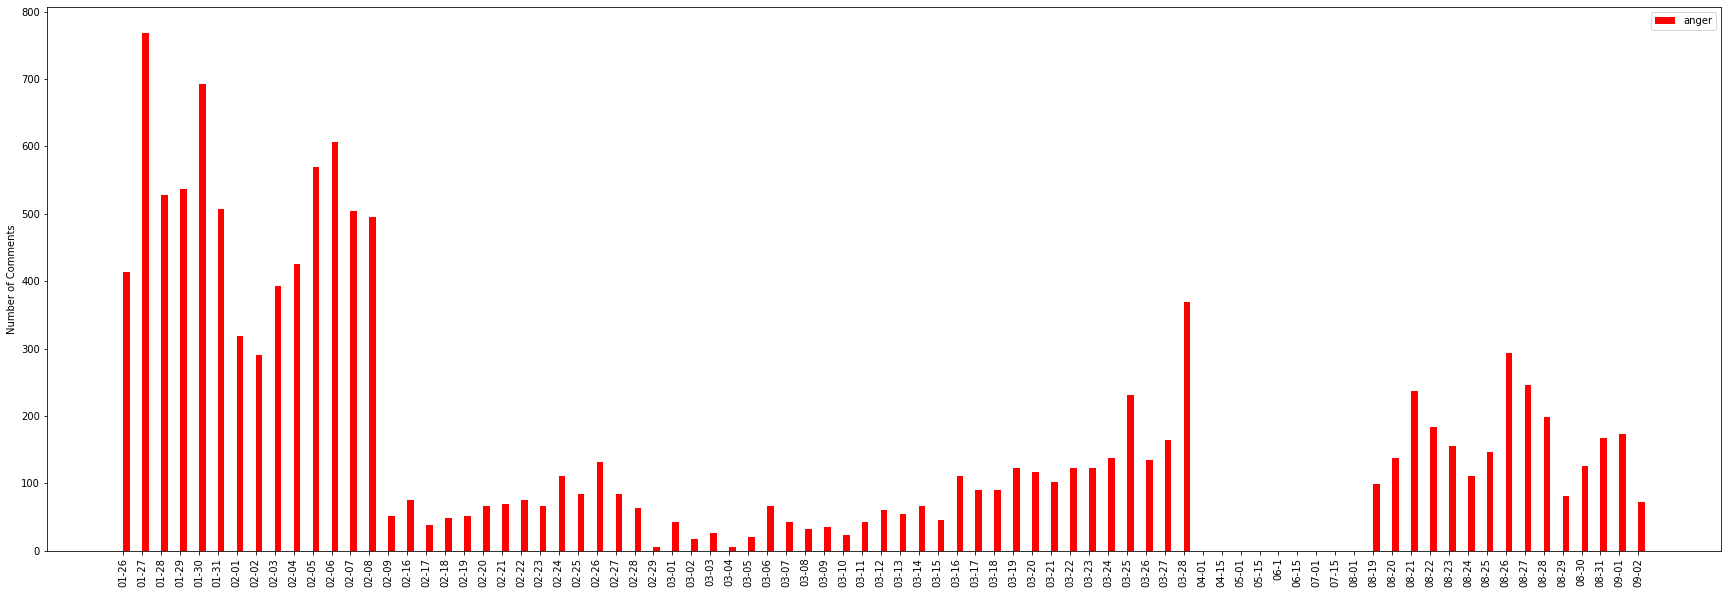

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

date = graph1['date']
fear = graph1['Fear']
anger = graph1['Anger']

x = np.arange(len(date))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, fear, width, label='fear')
rects2 = ax.bar(x + width/2, anger, width, label='anger', color = 'red')

ax.set_ylabel('Number of Comments')
#ax.set_title('Anger & Fear distribution')
#ax.set_xticks([0, 1, 2],['Jan', 'Feb', 'March'], st)
#ax.set_xticklabels(date)
ax.legend()
plt.xticks(x, date, rotation=90)
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

In [ ]:
mis = pd.read_excel('/content/drive/MyDrive/IHSIP/All_Posts_Covid_Instagram(N=9,648)_cleaned_with_emo&senti&misinfo.xlsx')

In [ ]:
mis.columns

Index(['imagename', 'postid', 'dataset', 'dataset.1', 'postdate', 'Contents',
       'url', 'likeCount', 'commentCount', 'Q1_pertain_to_covid',
       'Q2_cetegory', 'Q2A_Type of Human', 'Q3_associate_china',
       'Q4_face_mask', 'Q5_presence_asian',
       'Q5A.  If yes to Q5, what type of Asian', 'Q6_people_count', 'Q7_gaze',
       'Q8_threat_covid', 'Q9_susceptibility_covid',
       'Q9A_Asian responsible for the covid', 'Q10_solution_present',
       'Q11_recommended_solution', 'misinformation',
       'Q12 Presence of conspiracy theory', 'Q12-Others',
       'Q13.  Image of plague doctor costume', 'Note', 'mean_sentiment',
       'Joy_count', 'Sadness_count', 'Anger_count', 'Fear_count',
       'Other_count', 'Joy_ratio', 'Sadness_ratio', 'Anger_ratio',
       'Fear_ratio', 'Other_ratio'],
      dtype='object')

In [ ]:
mis_graph = mis[['postdate', 'misinformation']]

In [ ]:
mis_graph = mis_graph.groupby(['postdate']).sum().reset_index()
mis_graph

,postdate,misinformation
0,2020-01-26,10
1,2020-01-27,17
2,2020-01-28,22
3,2020-01-29,13
4,2020-01-30,15
...,...,...
67,2020-08-29,0
68,2020-08-30,3
69,2020-08-31,1
70,2020-09-01,0


In [ ]:
for i in range(len(mis_graph['postdate'])):
  s = mis_graph['postdate'][i]
  s_split = str(s).split(' ')[0]
  mis_graph['postdate'][i] = s_split[5:]
mis_graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,postdate,misinformation
0,01-26,10
1,01-27,17
2,01-28,22
3,01-29,13
4,01-30,15
...,...,...
67,08-29,0
68,08-30,3
69,08-31,1
70,09-01,0


In [ ]:
empty_date = ['04-01', '04-15', '05-01', '05-15', '06-01', '06-15', '07-01', '07-15', '08-01']
for i in range(9):
  new_row = {'postdate': empty_date[i], 'misinformation': 0}
  mis_graph = mis_graph.append(new_row, ignore_index=True)
mis_graph

,postdate,misinformation
0,01-26,10
1,01-27,17
2,01-28,22
3,01-29,13
4,01-30,15
...,...,...
76,06-01,0
77,06-15,0
78,07-01,0
79,07-15,0


In [ ]:
mis_graph = mis_graph.sort_values(by = 'postdate')
mis_graph

,postdate,misinformation
0,01-26,10
1,01-27,17
2,01-28,22
3,01-29,13
4,01-30,15
...,...,...
67,08-29,0
68,08-30,3
69,08-31,1
70,09-01,0


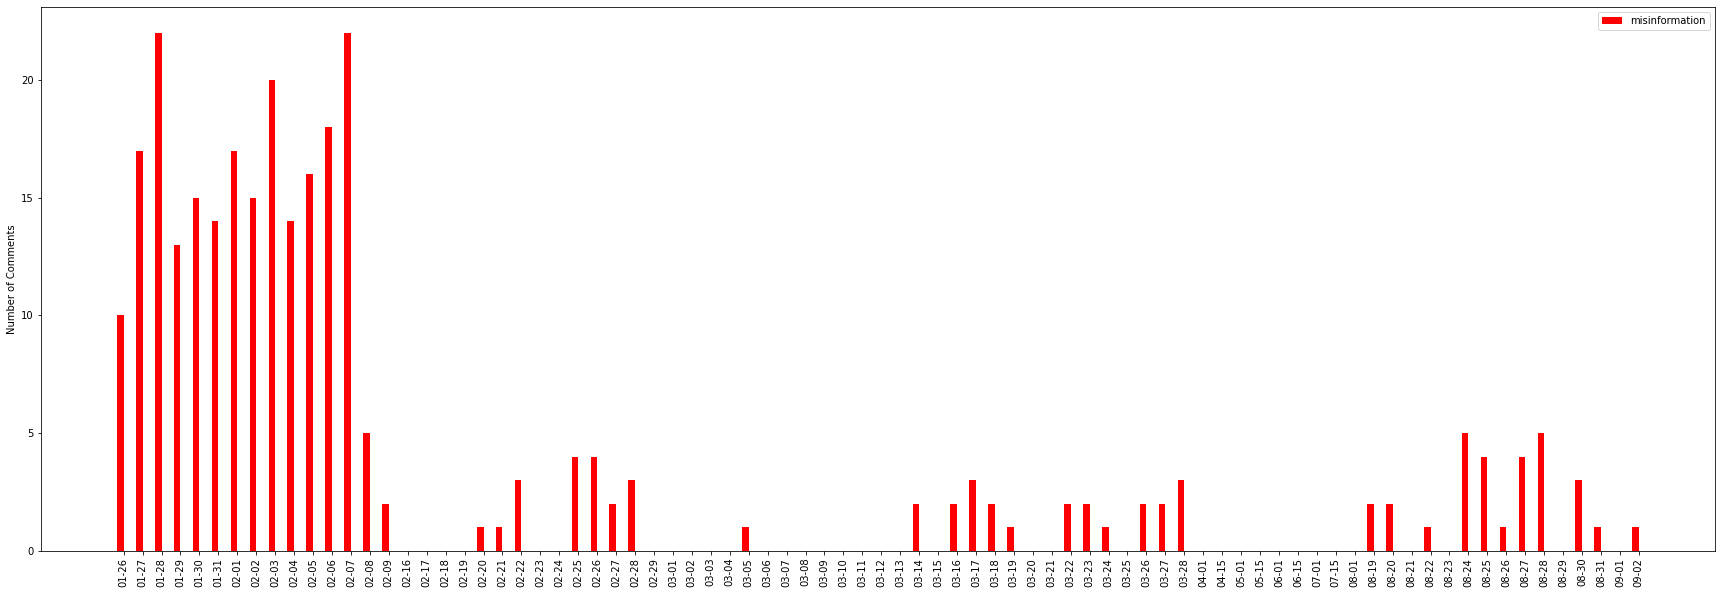

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

date = mis_graph['postdate']
misinformation = mis_graph['misinformation']


x = np.arange(len(date))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, misinformation, width, label='misinformation', color = 'red')

ax.set_ylabel('Number of Comments')
#ax.set_title('Anger & Fear distribution')
#ax.set_xticks([0, 1, 2],['Jan', 'Feb', 'March'], st)
#ax.set_xticklabels(date)
ax.legend()
plt.xticks(x, date, rotation=90)
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

In [ ]:
# from emoji import UNICODE_EMOJI

# # find out this comment is all emoji or not, return Boolean
# def isall_emoji(s):
#   count = 0
#   for i in s:
#     if i in UNICODE_EMOJI['en']:
#       count += 1
#   if count == len(s):
#     return True
#   return False

# # find out if there are any emojis in the comment, return Boolean
# def is_emoji(s):
#   count = 0
#   for i in s:
#     if i in UNICODE_EMOJI['en']:
#       return True
#   return False

# # Delete non-English content if this comment contains emoji, return list
# def delete_nonen (s):
#   wl = ''
#   el = ''
#   for i in range(len(s)): 
#     if s[i] not in UNICODE_EMOJI['en']:
#       wl += s[i]
#     else:
#       el += s[i]
#   wl = wl.split()
#   wl_non = ''
#   for j in wl:
#     if j in words.words():
#       wl_non += j
#   wl_non += ' '
#   wl_non += el
#   return wl_non


# # check if the whole comment is non English
# def isall_nonen(s):
#   for i in s:
#     if i in words.words():
#       return False
#   return True

# # check if there is # or @ in the comment
# def is_tag(s):
#   for i in s:
#     if i == '#' or i == '@':
#       return True
#   return False


In [ ]:
# dataset = pd.read_excel('/content/drive/MyDrive/IHSIP/cleaned_with_meta_data(25634)Jul_14.xlsx')
# dataset[0:11]

,Unnamed: 0,postid,username,comment,dataset
0,0,B7--VEMJWfD,fallschrimjager_,👏👏👏😍😍😍,1
1,1,B7--VEMJWfD,djmackjp,Thank you! 🙏,1
2,2,B7--VEMJWfD,fandee_g,Josss 👍👍👍,1
3,3,B7--VEMJWfD,bangfrank_,hih serem,1
4,4,B7--VEMJWfD,destiana,#fx_hdr #igworldclub_edits #total_editpics #ph...,1
5,5,B7--VEMJWfD,iam_y0y0,🔥🔥🔥,1
6,6,B7--VEMJWfD,ekachimot_dkz_kill,Iish ish 👏👏,1
7,7,B7--VEMJWfD,photo_creation_silver,Super😍👏👏,1
8,8,B7--VEMJWfD,b_gundal,Aassyyeedaaaffff...👍👍👍,1
9,9,B7-15BuDTF4,gingerfoxfitt,#wuhan,1


In [ ]:
# from langdetect import DetectorFactory, detect, detect_langs
# import emoji
# count = 0
# for i in range(17116, 256464):
#   sentence = dataset['comment'][i].lower()
#   #sentence = emoji.demojize(sentence)
#   doc = nlp(sentence) #3
#   words_list = sentence.split()
#   detect_language = doc._.language #4
#   print(i, sentence)
#   if len(words_list) < 10:
#     if is_tag(sentence) == False:
#       if is_emoji(sentence) == True:
#         print(words_list)
#         if isall_emoji(sentence) == False and isall_nonen(words_list) == True:
#           print(isall_emoji(sentence),isall_nonen(words_list), sentence)
#           dataset['comment'][i] = delete_nonen(sentence)
#           print(dataset['comment'][i])
#       else:
#         if isall_nonen(words_list) == True:
#           dataset = dataset.drop(i, axis = 0)
#           count += 1
#           print(count)
#   else:
#     if detect_language['language'] != 'en' and detect_language['score'] > 0.9:
#       print(sentence)
#       print(i, detect_language)
#       dataset = dataset.drop(i, axis = 0)
#       count += 1
#       print(count)

# dataset[0:11]

In [ ]:
# dataset = dataset.reset_index(drop=True)
# dataset = dataset.drop(columns={'index', 'Unnamed: 0'})

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# from nltk.stem.porter import PorterStemmer
# from nltk.corpus import stopwords

In [ ]:
# ps = PorterStemmer()

In [ ]:
# stemmed_dataset = []
# for i in range(22676):
#   print(i, dataset['comment'][i])
#   stemmed_array = dataset['comment'][i].split()
#   stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
#   stemmed = ' '.join(stemmed)
#   stemmed_dataset.append(stemmed)

# print(stemmed_dataset[0:5])

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# X = cv.fit_transform(stemmed_dataset)

In [ ]:
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(22676):
#   kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
#   kmeans.fit(X)
#   wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:88: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: ignored

In [ ]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.cluster import KMeans 
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import normalize
# from sklearn.metrics import pairwise_distances

# import nltk
# import string

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('fivethirtyeight')

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# data = dataset['comment']


# tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
#                              max_features = 20000)
# tf_idf = tf_idf_vectorizor.fit_transform(data)
# tf_idf_norm = normalize(tf_idf)
# tf_idf_array = tf_idf_norm.toarray()

In [ ]:
# pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,0010,0020,005,0050,005000,008,00for,00mohamad,00pm,0173,01pm,01sfitz,0384telegram,04,0456,05,07,08htctrn08,0912,09_11846,0alyyaa,0hadriana,10,100,1000,10000,100000,1000000,1000boxesfunction,1000for,1008,100k,100milhões,100poundsdown,101,107,10k,10km,...,ärgerlich,ça,éxito,òtimo,ğuahajajjahsjs,ım,łodzi,śliczny,şeyleri,şimdi,și,ție,έτσι,αλίκη,για,γόβες,είναι,και,κορίτσι,κούκλα,μεκοιταςπουσεκοιταω,μου,ομορφη,παρα,πολυ,σου,σύνολο,τέλεια,τέλειο,τελεια,τελειο,τις,το,τρελενομαι,υπέροχο,φωτογραφια,φωτό,χαχα,χρωματιστό,όλο
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# class Kmeans:
#     """ K Means Clustering
    
#     Parameters
#     -----------
#         k: int , number of clusters
        
#         seed: int, will be randomly set if None
        
#         max_iter: int, number of iterations to run algorithm, default: 200
        
#     Attributes
#     -----------
#        centroids: array, k, number_features
       
#        cluster_labels: label for each data point
       
#     """
    
#     def __init__(self, k, seed = None, max_iter = 200):
#         self.k = k
#         self.seed = seed
#         if self.seed is not None:
#             np.random.seed(self.seed)
#         self.max_iter = max_iter
        
            
    
#     def initialise_centroids(self, data):
#         """Randomly Initialise Centroids
        
#         Parameters
#         ----------
#         data: array or matrix, number_rows, number_features
        
#         Returns
#         --------
#         centroids: array of k centroids chosen as random data points 
#         """
        
#         initial_centroids = np.random.permutation(data.shape[0])[:self.k]
#         self.centroids = data[initial_centroids]

#         return self.centroids
    
    
#     def assign_clusters(self, data):
#         """Compute distance of data from clusters and assign data point
#            to closest cluster.
        
#         Parameters
#         ----------
#         data: array or matrix, number_rows, number_features
        
#         Returns
#         --------
#         cluster_labels: index which minmises the distance of data to each
#         cluster
            
#         """
        
#         if data.ndim == 1:
#             data = data.reshape(-1, 1)
        
#         dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
#         self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
#         return  self.cluster_labels
    
    
#     def update_centroids(self, data):
#         """Computes average of all data points in cluster and
#            assigns new centroids as average of data points
        
#         Parameters
#         -----------
#         data: array or matrix, number_rows, number_features
        
#         Returns
#         -----------
#         centroids: array, k, number_features
#         """
        
#         self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
#         return self.centroids
    
    
    
#     def predict(self, data):
#         """Predict which cluster data point belongs to
        
#         Parameters
#         ----------
#         data: array or matrix, number_rows, number_features
        
#         Returns
#         --------
#         cluster_labels: index which minmises the distance of data to each
#         cluster
#         """
        
#         return self.assign_clusters(data)
    
#     def fit_kmeans(self, data):
#         """
#         This function contains the main loop to fit the algorithm
#         Implements initialise centroids and update_centroids
#         according to max_iter
#         -----------------------
        
#         Returns
#         -------
#         instance of kmeans class
            
#         """
#         self.centroids = self.initialise_centroids(data)
        
#         # Main kmeans loop
#         for iter in range(self.max_iter):

#             self.cluster_labels = self.assign_clusters(data)
#             self.centroids = self.update_centroids(data)          
#             if iter % 100 == 0:
#                 print("Running Model Iteration %d " %iter)
#         print("Model finished running")
#         return self   

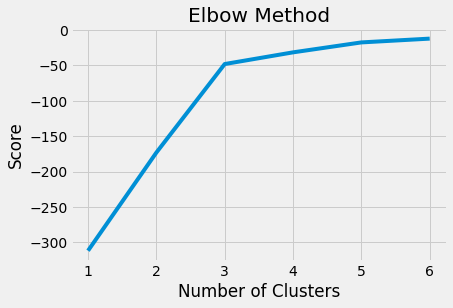

In [ ]:
# number_clusters = range(1, 7)

# kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
# kmeans

# score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
# score

# plt.plot(number_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Method')
# plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


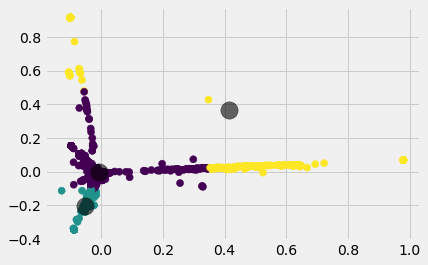

In [ ]:
# sklearn_pca = PCA(n_components = 2)
# Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
# test_e = Kmeans(3, 1, 600)
# fitted = test_e.fit_kmeans(Y_sklearn)
# predicted_values = test_e.predict(Y_sklearn)

# plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

# centers = fitted.centroids
# plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [ ]:
# from sklearn.cluster import KMeans
# sklearn_pca = PCA(n_components = 2)
# Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
# kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
# fitted = kmeans.fit(Y_sklearn)
# prediction = kmeans.predict(Y_sklearn)

In [ ]:
# def get_top_features_cluster(tf_idf_array, prediction, n_feats):
#     labels = np.unique(prediction)
#     dfs = []
#     for label in labels:
#         id_temp = np.where(prediction==label) # indices for each cluster
#         x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
#         sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
#         features = tf_idf_vectorizor.get_feature_names()
#         best_features = [(features[i], x_means[i]) for i in sorted_means]
#         df = pd.DataFrame(best_features, columns = ['features', 'score'])
#         dfs.append(df)
#     return dfs
# dfs = get_top_features_cluster(tf_idf_array, prediction, 15)
# dfs

[       features     score
 0          love  0.010978
 1         thank  0.008565
 2     beautiful  0.007801
 3           wow  0.006039
 4          good  0.005799
 5          safe  0.005013
 6       amazing  0.004905
 7         great  0.004854
 8          like  0.004512
 9   coronavirus  0.004128
 10         stay  0.004066
 11       follow  0.003750
 12        price  0.003610
 13         cute  0.003560
 14       thanks  0.003534,      features     score
 0        nice  0.750898
 1         pic  0.036697
 2        shot  0.031909
 3         bro  0.024272
 4        work  0.016493
 5     looking  0.012522
 6       smile  0.012384
 7     caption  0.011433
 8         wow  0.009985
 9      outfit  0.009836
 10    picture  0.008723
 11     really  0.007978
 12    awesome  0.007313
 13        ohh  0.006600
 14  mashallah  0.006240,      features     score
 0        amen  0.955710
 1        lord  0.025689
 2       thank  0.023951
 3       jesus  0.022750
 4         oss  0.005383
 5       hands  0.